# Finance Data Project 

This data project we will focus on exploratory data analysis of stock prices. Please note that it is not meant to be a robust financial analysis or be taken as financial advice.

The focus is on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Data

The stock information for the following banks were analysed:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

BAC = data.DataReader("BAC", 'google', start, end)

CG = data.DataReader("CG", 'google', start, end)

GS = data.DataReader("GS", 'google', start, end)

JPM = data.DataReader("JPM", 'google', start, end)

MS = data.DataReader("MS", 'google', start, end)

WFC = data.DataReader("WFC", 'google', start, end)

A list of the ticker symbols (as strings) in alphabetical order was created

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [5]:
bank_stocks = pd.read_pickle(r'C:\Users\shrav\Downloads\all_banks')

Column names were set

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# Data Analysis



Maximum Close price for each bank's stock throughout the time period:

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

A new dataframe with the returns for each bank's stock was created.

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Pairplot using seaborn of the returns dataframe was created.

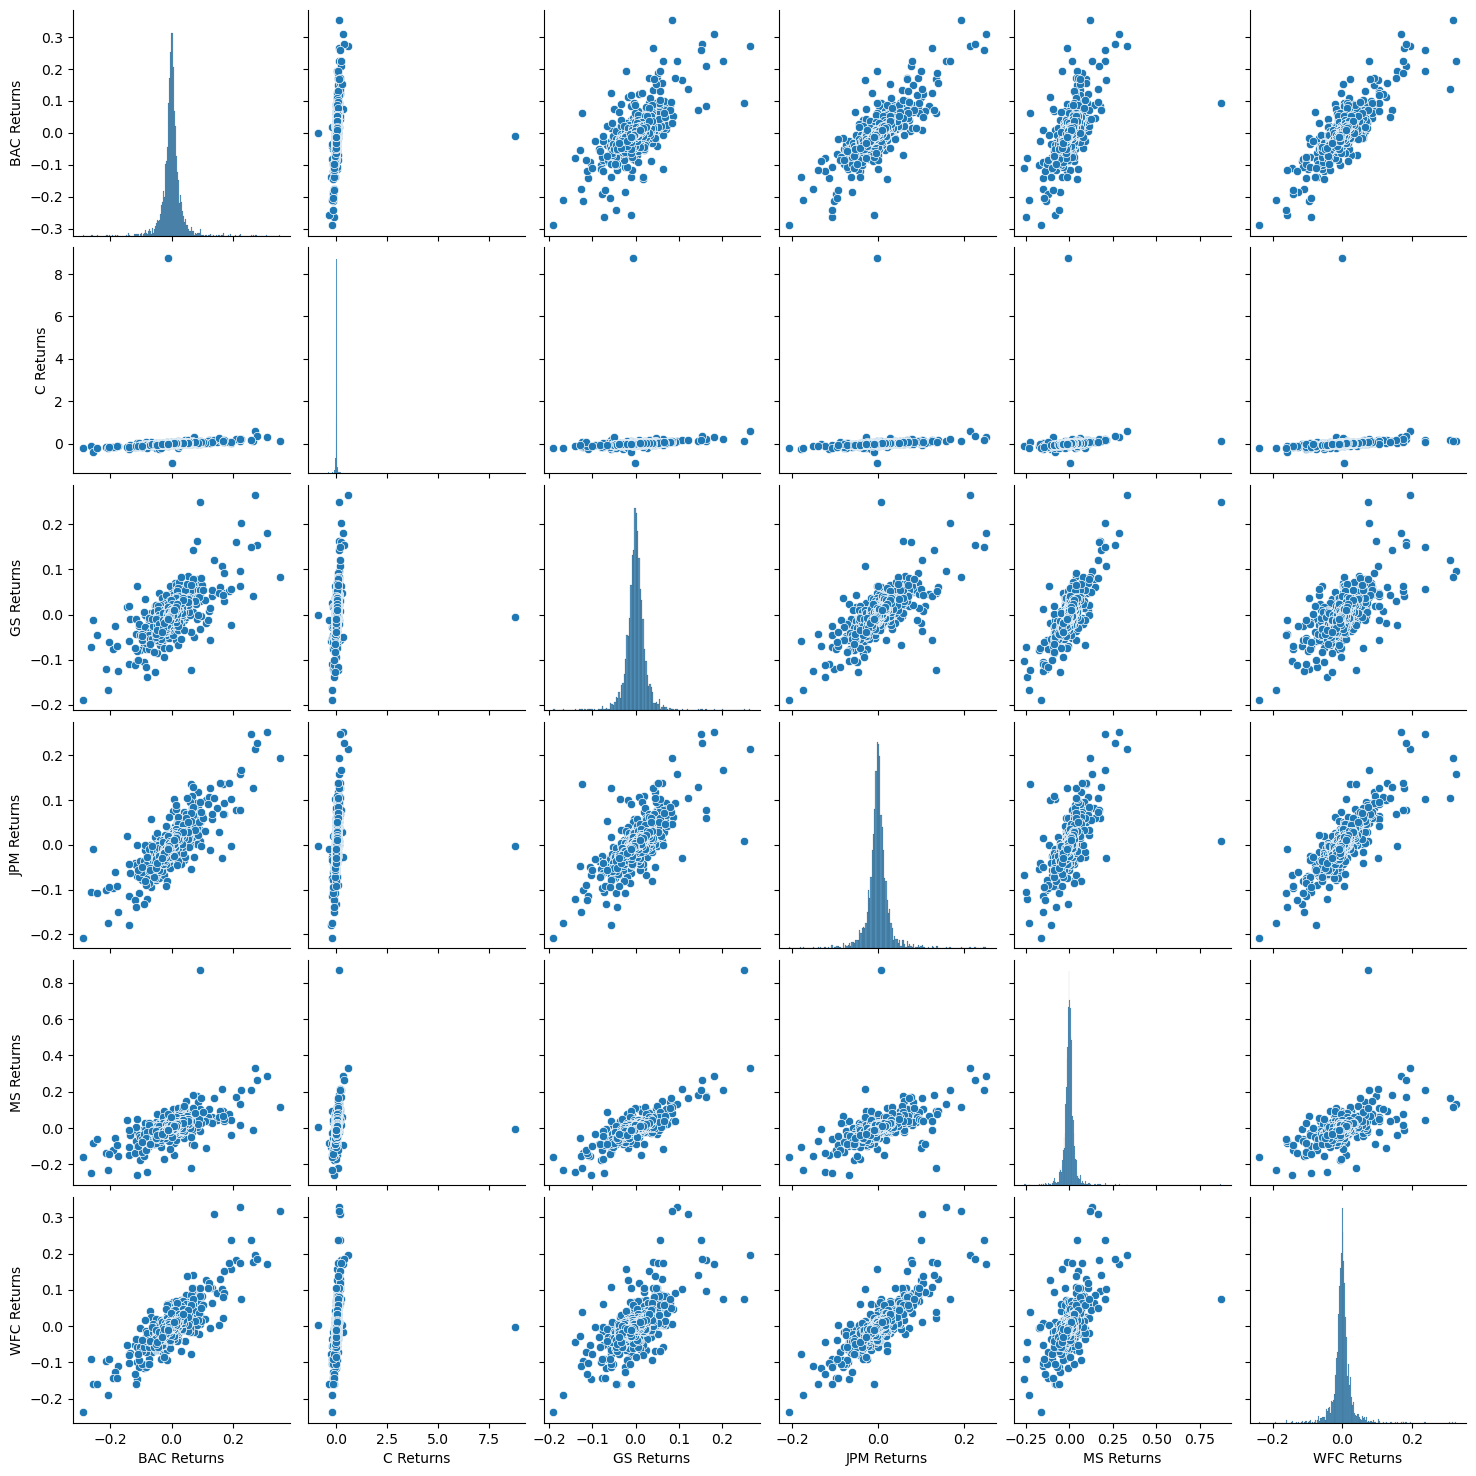

In [11]:
sns.pairplot(returns)

Citigroup had the most unusual behaviour.

Dates each bank stock had the best and worst single day returns: 
It can be seen that 4 of the banks share the same day for the worst drop on the same day.

In [12]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [13]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

From the standard deviation of the returns, Citigroup stocks were the riskiest over the entire time period while Morgan Stanley was the riskiest for the year 2015

In [14]:
returns.std()

BAC Returns    0.036650
C Returns      0.179969
GS Returns     0.025346
JPM Returns    0.027656
MS Returns     0.037820
WFC Returns    0.030233
dtype: float64

In [15]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

A distplot using seaborn of the 2015 returns for Morgan Stanley

C:\Users\shrav\AppData\Local\Temp\ipykernel_25220\3525743892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'],bins=30)


<Axes: xlabel='MS Returns', ylabel='Density'>

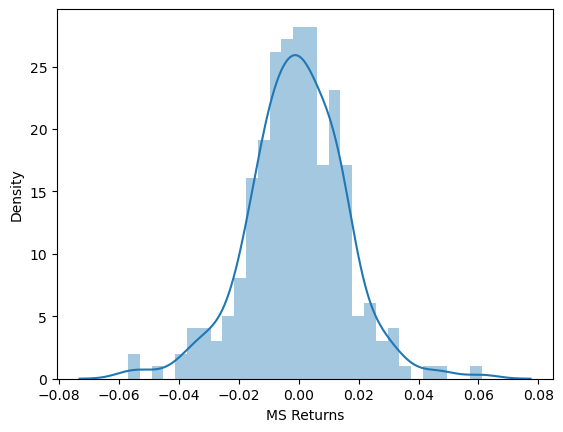

In [16]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'],bins=30)

Distplot using seaborn of the 2008 returns for CitiGroup

C:\Users\shrav\AppData\Local\Temp\ipykernel_25220\703431472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Returns'], color='red')


<Axes: xlabel='C Returns', ylabel='Density'>

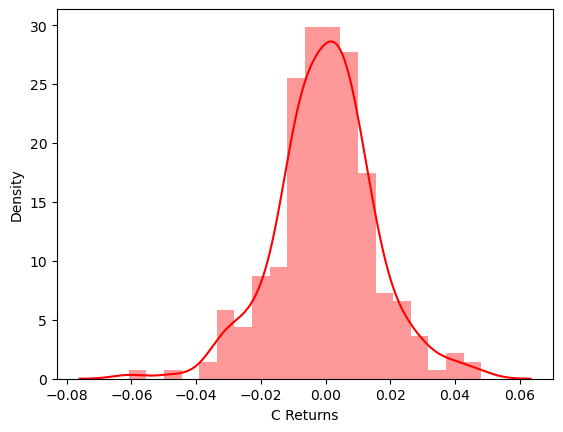

In [17]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Returns'], color='red')

____
# More Visualization


### Imports

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

C:\Users\shrav\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



A line plot showing Close price for each bank for the entire index of time. 

<Axes: xlabel='Date'>

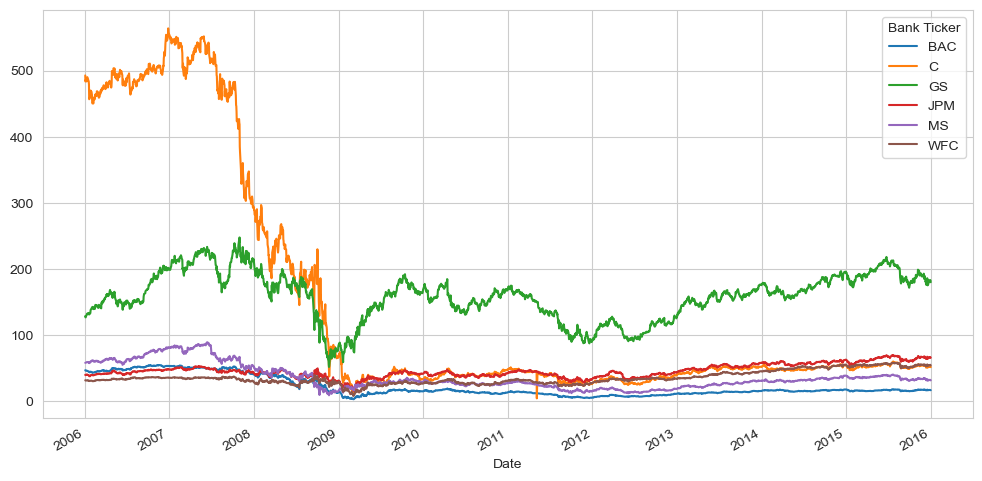

In [19]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,6))

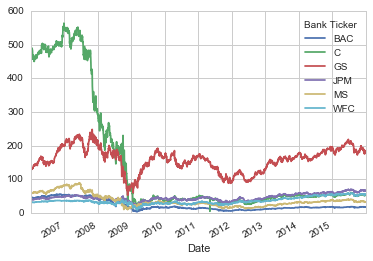

In [18]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()
plt.legend(title='Bank Ticker')

## Moving Averages

An analysis on the moving averages for these stocks in the year 2008. 

Plot of the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

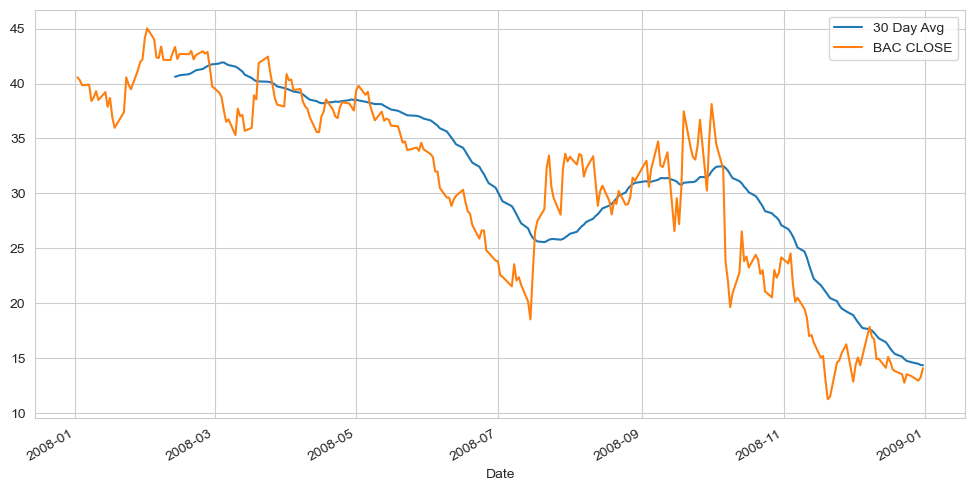

In [34]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend() 

Heatmap of the correlation between the stocks Close Price.

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

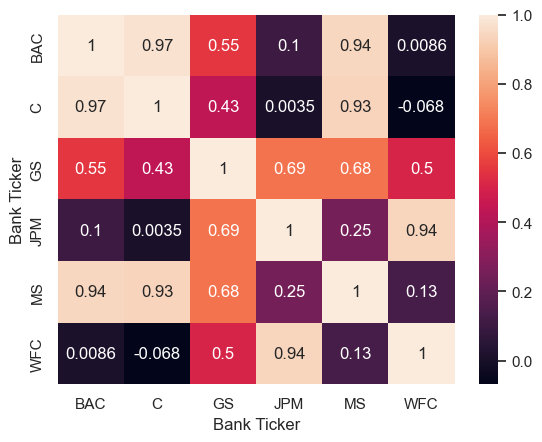

In [40]:
tp = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
tp
sns.heatmap(tp,annot=True)

Clustermap to cluster the correlations together:

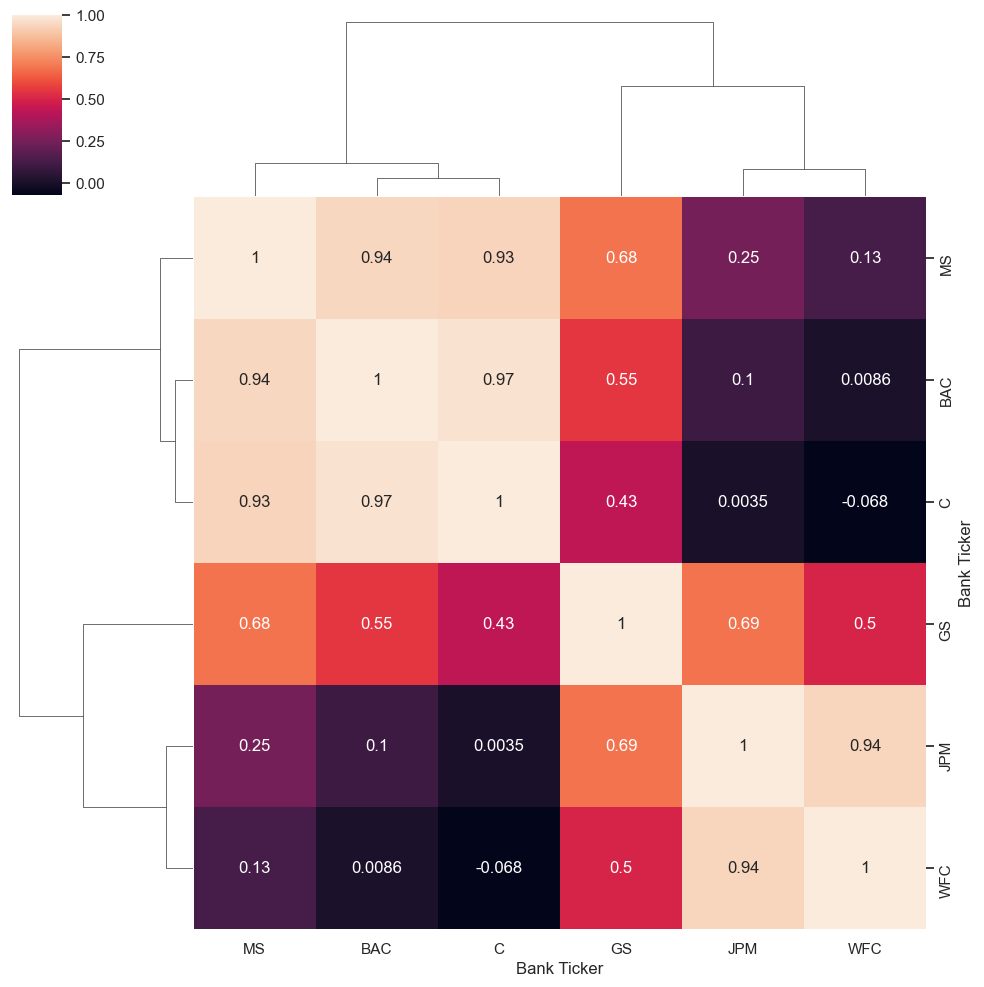

In [41]:
sns.clustermap(tp,annot=True)

# Using Cufflinks

Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [30]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [36]:
MS=bank_stocks['MS']
MS.loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.

In [32]:
BAC.loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')